### Step4 and 5
### Location and Timeseries Analysis

In [1]:
import os
import time
import subprocess

from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.sql import SQLContext

sqlContext = SQLContext(sc)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [ ]:
df = spark.read.parquet("gs://msca-bdp-students-bucket/shared_data/safzal1/finalprojectdata_AfterStep2")

23/03/10 11:05:37 WARN org.apache.spark.scheduler.cluster.YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/03/10 11:05:52 WARN org.apache.spark.scheduler.cluster.YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/03/10 11:06:07 WARN org.apache.spark.scheduler.cluster.YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
23/03/10 11:06:22 WARN org.apache.spark.scheduler.cluster.YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


In [ ]:
pd.set_option('display.max_rows', None)


### Cleaning the User.Location Data

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike("USA"), "United States of America").otherwise(col("User_Defined_Location")))


In [ ]:
state_codes = [
    "AL",  # Alabama
    "AK",  # Alaska
    "AZ",  # Arizona
    "AR",  # Arkansas
    "CA",  # California
    "CO",  # Colorado
    "CT",  # Connecticut
    "DE",  # Delaware
    "FL",  # Florida
    "GA",  # Georgia
    "HI",  # Hawaii
    "ID",  # Idaho
    "IL",  # Illinois
    "IN",  # Indiana
    "IA",  # Iowa
    "KS",  # Kansas
    "KY",  # Kentucky
    "LA",  # Louisiana
    "ME",  # Maine
    "MD",  # Maryland
    "MA",  # Massachusetts
    "MI",  # Michigan
    "MN",  # Minnesota
    "MS",  # Mississippi
    "MO",  # Missouri
    "MT",  # Montana
    "NE",  # Nebraska
    "NV",  # Nevada
    "NH",  # New Hampshire
    "NJ",  # New Jersey
    "NM",  # New Mexico
    "NY",  # New York
    "NC",  # North Carolina
    "ND",  # North Dakota
    "OH",  # Ohio
    "OK",  # Oklahoma
    "OR",  # Oregon
    "PA",  # Pennsylvania
    "RI",  # Rhode Island
    "SC",  # South Carolina
    "SD",  # South Dakota
    "TN",  # Tennessee
    "TX",  # Texas
    "UT",  # Utah
    "VT",  # Vermont
    "VA",  # Virginia
    "WA",  # Washington
    "WV",  # West Virginia
    "WI",  # Wisconsin
    "WY"   # Wyoming
]


In [ ]:
state_codes = '|'.join(["(" + c +")" for c in state_codes])

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike(state_codes), "United States of America").otherwise(col("User_Defined_Location")))


In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('United States'), "United States of America").otherwise(col("User_Defined_Location")))


In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('India'), "India").otherwise(col("User_Defined_Location")))


In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('Mumbai'), "India").otherwise(col("User_Defined_Location")))


In [ ]:
#step done this is also done
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('Delhi'), "India").otherwise(col("User_Defined_Location")))


In [ ]:
cities = [
    "New York",
    "Los Angeles",
    "Chicago",
    "Houston",
    "Phoenix",
    "Philadelphia",
    "San Antonio",
    "San Diego",
    "Dallas",
    "San Jose",
    "Austin",
    "Jacksonville",
    "Fort Worth",
    "Columbus",
    "San Francisco",
    "Charlotte",
    "Indianapolis",
    "Seattle",
    "Denver",
    "Washington, D.C.",
    'Arizona',
    'Chicago',
    'Michigan',
    'Washington, DC',
    'Texas'
]

In [ ]:
cities = '|'.join(["(" + c +")" for c in cities])

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike(cities), "United States of America").otherwise(col("User_Defined_Location")))

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('Canada'), "Canada").otherwise(col("User_Defined_Location")))

In [ ]:
provinces_canada = [
    "Alberta",
    "British Columbia",
    "Manitoba",
    "New Brunswick",
    "Newfoundland and Labrador",
    "Northwest Territories",
    "Nova Scotia",
    "Nunavut",
    "Ontario",
    "Prince Edward Island",
    "Quebec",
    "Saskatchewan",
    "Yukon"
]

In [ ]:
provinces_canada = '|'.join(["(" + c +")" for c in provinces_canada])

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike(provinces_canada), "Canada").otherwise(col("User_Defined_Location")))

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('Nigeria'), "Nigeria").otherwise(col("User_Defined_Location")))

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('Bharat'), "India").otherwise(col("User_Defined_Location")))

In [ ]:
### this is done
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('United Kingdom'), "UK").otherwise(col("User_Defined_Location")))

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('London'), "UK").otherwise(col("User_Defined_Location")))

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('England'), "UK").otherwise(col("User_Defined_Location")))

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('Kenya'), "Kenya").otherwise(col("User_Defined_Location")))

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('Uganda'), "Uganda").otherwise(col("User_Defined_Location")))

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('Uruguay'), "Uruguay").otherwise(col("User_Defined_Location")))

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('Pakistan'), "Pakistan").otherwise(col("User_Defined_Location")))

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('Ghana'), "Ghana").otherwise(col("User_Defined_Location")))

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('Toronto'), "Canada").otherwise(col("User_Defined_Location")))

In [ ]:
df = df.withColumn("User_Defined_Location", when(col("User_Defined_Location").rlike('South Africa'), "South Africa").otherwise(col("User_Defined_Location")))

In [32]:
## saving cleaned
df.write.parquet("gs://msca-bdp-students-bucket/shared_data/safzal1/finalprojectdata_AfterStep_Loc_Cleaned_Final4")

In [102]:
df = spark.read.parquet("gs://msca-bdp-students-bucket/shared_data/safzal1/loc3")

In [103]:
df.count()

1731801

In [104]:
df = df.dropDuplicates(['User_ID'])

In [105]:
df.count()

932960

In [106]:
df = df.filter(col('User_Defined_Location').isNotNull())

In [107]:
df.count()

556552

In [133]:
df_loc_pd = df.groupBy('User_Defined_Location').agg(count('User_ID').alias\
                    ('counts')).orderBy('counts', ascending = False).toPandas()

In [171]:
df_loc_pd.head(6).set_axis(['Countries', 'Count of Twitterer'] , axis = 1).transpose()

,0,1,2,3,4,5
Countries,United States of America,India,United Kingdom,Nigeria,Canada,Pakistan
Count of Twitterer,144915,42121,28991,24580,17221,8837


In [135]:
df_loc_pd.User_Defined_Location[df_loc_pd.User_Defined_Location == 'UK'] = 'United Kingdom'

/tmp/ipykernel_4672/2263051445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc_pd.User_Defined_Location[df_loc_pd.User_Defined_Location == 'UK'] = 'United Kingdom'


In [136]:
df_loc_pd

,User_Defined_Location,counts
0,United States of America,144915
1,India,42121
2,United Kingdom,28991
3,Nigeria,24580
4,Canada,17221
...,...,...
132689,"Joinville, Santa Catarina",1
132690,edtwt & shtwt dni,1
132691,5' exactly,1
132692,"مورو, پاکستان",1


In [137]:
import geopandas as gpd

In [138]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [139]:
merged = world.merge(df_loc_pd, how='left', left_on='name', right_on='User_Defined_Location')

In [140]:
merged.counts

0          64.0
1         189.0
2           NaN
3       17221.0
4      144915.0
         ...   
172         7.0
173         6.0
174         6.0
175       146.0
176         NaN
Name: counts, Length: 177, dtype: float64

<AxesSubplot:>

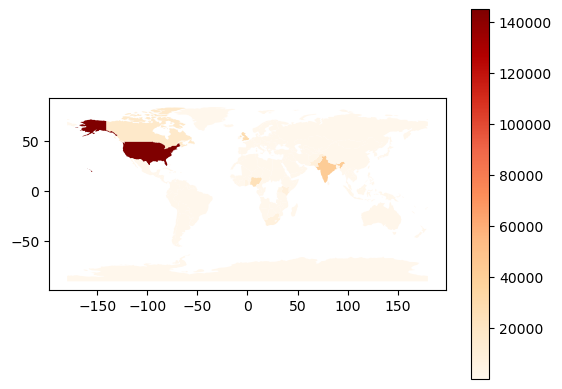

In [141]:
merged.plot(column='counts', cmap='OrRd', legend=True)

In [142]:
merged.counts = merged.counts.astype('float')

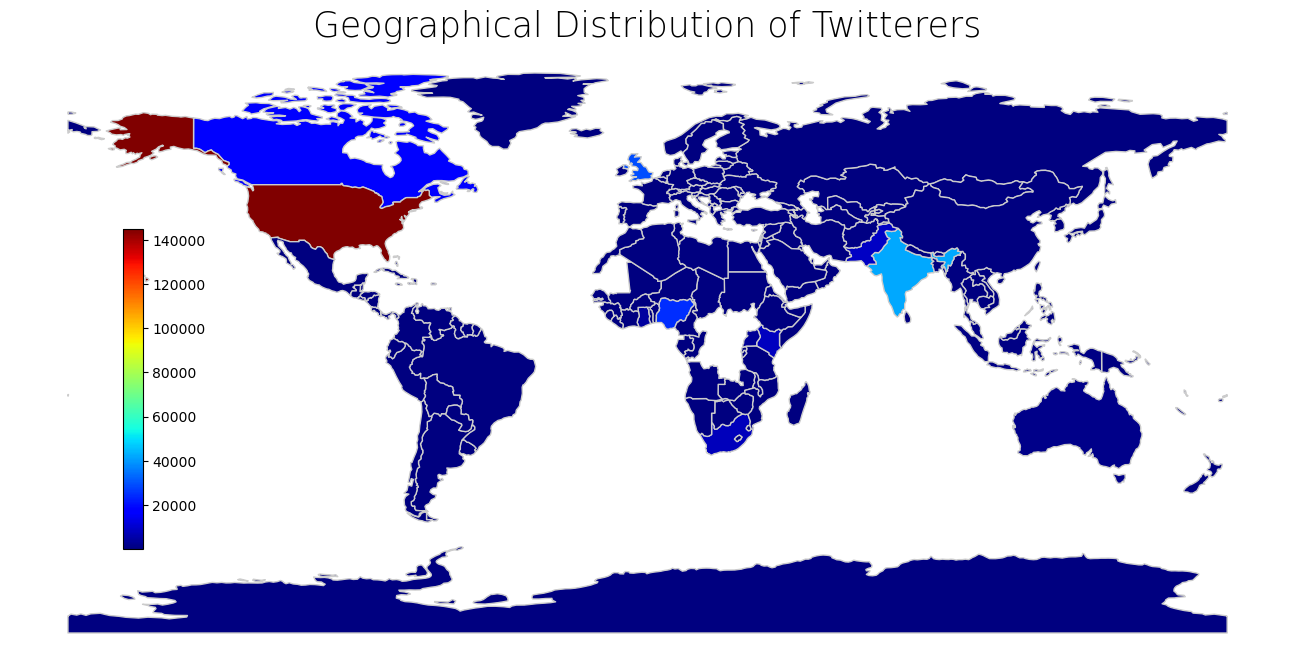

In [170]:
# Print the map
# Set the range for the choropleth
title = 'Geographical Distribution of Twitterers'
vmin = merged['counts'].min()
vmax = merged['counts'].max()
cmap = 'plasma'
# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))
# Remove the axis
ax.axis('off')
merged.plot(column='counts', ax=ax, edgecolor='0.8', linewidth=1, cmap='jet')
# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
# Create an annotation for the data source

            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='jet')
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.25, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

### Running analysis using place.location to cross valide, as this is accurate location but majority of data is null

In [28]:
#print("Nulls in User_Location Column", df.filter(col('User_Defined_Location').isNull()).count())

In [29]:
#print("Nulls in User_Location Column", df.filter(col('User_Defined_Location').isNotNull()).count())

In [30]:
df = df.filter(col('Place_Country').isNotNull())

In [31]:
df = df.dropDuplicates(['User_ID'])

In [32]:
df.count()

1917

In [33]:
df_loc = df.groupBy('Place_Country').agg(count('User_ID').alias('Tweets')).orderBy('Tweets', ascending = False)

In [34]:
df_loc_pd = df_loc.toPandas()

In [37]:
df_loc_pd.head(6).transpose()

,0,1,2,3,4,5
Place_Country,United States,United Kingdom,India,Kingdom of Saudi Arabia,Nigeria,Canada
Tweets,899,195,144,144,100,54


In [102]:
df_loc_pd.loc[0,'Place_Country'] = 'United States of America'
df_loc_pd.loc[1,'Place_Country'] = 'Saudi Arabia'
df_loc_pd.loc[4,'Place_Country'] = 'Saudi Arabia'

In [103]:
df_loc_pd = df_loc_pd.drop_duplicates('Place_Country')

In [105]:
df_loc_pd.head(10)


,Place_Country,Tweets
0,United States of America,897
1,Saudi Arabia,197
2,Kingdom of Saudi Arabia,144
3,India,143
5,Canada,57
6,المملكة العربية السعودية,44
7,Ghana,42
8,Kenya,33
9,South Africa,25
10,Pakistan,25


In [106]:
 import geopandas as gpd


In [107]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [108]:
merged = world.merge(df_loc_pd, how='left', left_on='name', right_on='Place_Country')

<AxesSubplot:>

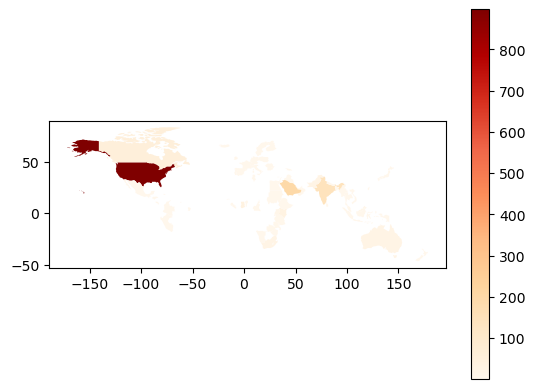

In [109]:
merged.plot(column='Tweets', cmap='OrRd', legend=True)


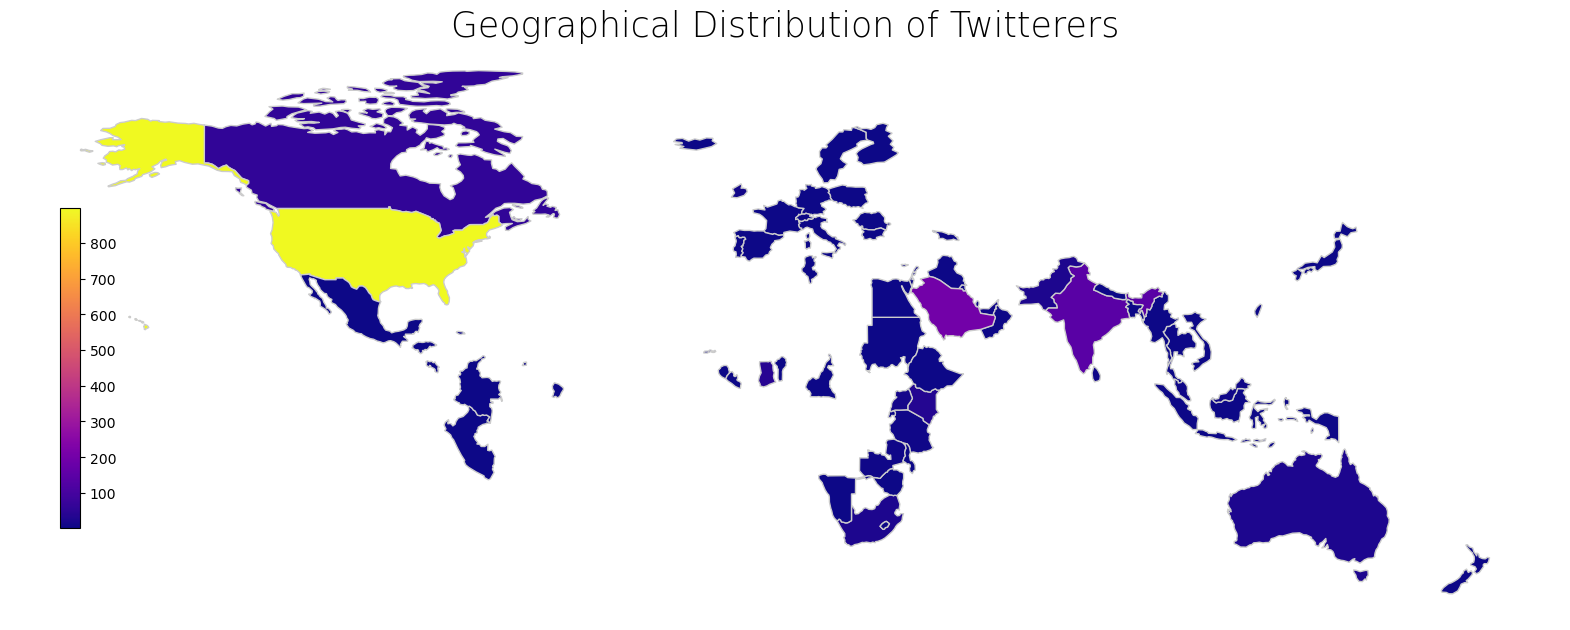

In [179]:
# Print the map
# Set the range for the choropleth
title = 'Geographical Distribution of Twitterers'
vmin = merged['Tweets'].min()
vmax = merged['Tweets'].max()
cmap = 'plasma'
# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))
# Remove the axis
ax.axis('off')
merged.plot(column='Tweets', ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
# Create an annotation for the data source

            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

### New Topics

In [111]:
df = spark.read.parquet("gs://msca-bdp-students-bucket/shared_data/safzal1/loc3", inferSchema = True)

In [85]:
df.sample(False,0.0002).limit(10)

Tweet_ID,RT_Status_RT_Count,RT_Status_Like_Count,RT_Status_Reply_Count,RT_Stats_Quoted_Count,RT_Status_Original_User_ID,RT_Status_Original_User_Screen_Name,RT_Status_Original_User_Location,RT_Status_Original_User_Description,RT_Status_Original_User_Verified,RT_Status_Original_User_followers_count,RT_Status_Original_User_statuses_count,RT_Status_Original_User_listed_count,Parsed_Hashtags,User_ID,User_Name,User_Defined_Location,User_Description,User_Verified,User_Profile_Followers_Count,User_Tweets-Retweet_Count,User_List_Count,User_ID_Creation_Date,RT_Mentioned_User_ID,Tweet_Location_Lat,Tweet_Location_Long,If_Retweeted,If_Retweeted_Root,Place_Country,Text,Tweet_Text,Tweet_Date,Tweet_day_of_week,Tweet_month,Tweet_day,Tweet_year,Tweet_month_number,Tweet_date_str,Tweet_date_Concat
1576953050434252805,3,1,0,0,1467522567477018624,veerpathak9,null,assistant profess...,false,156,479,0,[],1502948832476549124,Har_preet_Kaur_,null,Assistant Professor,false,223,5699,0,Sun Mar 13 10:05:...,[1477112756801191...,null,null,false,RT,null,RT @veerpathak9: ...,@1158APFront5aab ...,Mon Oct 03 15:11:...,Mon,Oct,03,2022,10,2022/10/03,2022-10-03
1585004413764370432,10,21,2,3,1518966530956054530,OscoedIlesa,"Osun, Nigeria",Official Account ...,false,237,69,0,[],1528144893654228992,JamiuLa_Deelaw,Federal Capital T...,Educational consu...,false,51,6,0,Sat May 21 22:45:...,[],null,null,false,RT,null,RT @OscoedIlesa: ...,PRESS RELEASE BY ...,Tue Oct 25 20:24:...,Tue,Oct,25,2022,10,2022/10/25,2022-10-25
1544571108875292672,1320,7646,84,59,35836985,jonnybid,"Wymondham, Norfolk",Year 5/6 teacher ...,false,22914,31133,122,[],190286433,DimChanceCariad,UK,ever curious,false,579,185692,9,Mon Sep 13 15:28:...,[],null,null,false,RT,null,RT @jonnybid: Sin...,"Since 2014, we've...",Wed Jul 06 06:37:...,Wed,Jul,06,2022,07,2022/07/06,2022-07-06
1522011628392398853,1,2,1,0,925528754415374338,MercyEdSystem,null,null,false,358,4395,3,[],17637983,SistersofMercy,United States of ...,The Sisters of Me...,true,15970,53036,415,Wed Nov 26 01:07:...,[],null,null,false,RT,null,RT @MercyEdSystem...,We are very pleas...,Thu May 05 00:33:...,Thu,May,05,2022,05,2022/05/05,2022-05-05
1554094507141935104,41,40,0,0,1519982389971152896,kashmiriupdates,Kashmir,The aim of this h...,false,614,924,1,"[education, monda...",1329043013511774208,SanjayK69747234,null,null,false,56,15082,0,Wed Nov 18 12:45:...,[],null,null,false,RT,null,RT @kashmiriupdat...,You can change a ...,Mon Aug 01 13:19:...,Mon,Aug,01,2022,08,2022/08/01,2022-08-01
1603422238489051136,35,138,2,0,572284331,Gurdeepgurus,null,"AAP, Deadpool Fan...",false,17265,24373,41,[],1025417394850816000,DevSarkaar,null,Jai Hind....,false,2182,175526,0,Fri Aug 03 16:25:...,"[30417501, 304156...",null,null,false,RT,null,RT @Gurdeepgurus:...,Delhi Education M...,Thu Dec 15 16:10:...,Thu,Dec,15,2022,12,2022/12/15,2022-12-15
1550710947316121602,347,283,82,17,3030407906,yusufolamide15,"Sheffield, England",|| Chartered Acco...,false,229,615,3,[],937586268568944640,Omoba_Adedamola,null,"""it is all a matt...",false,17,869,0,Mon Dec 04 07:36:...,[],null,null,false,RT,null,RT @yusufolamide1...,Any educational N...,Sat Jul 23 05:14:...,Sat,Jul,23,2022,07,2022/07/23,2022-07-23
1610688103487868957,1702,9331,279,75,117777690,jeremycorbyn,UK,MP for Islington ...,true,2513542,16632,7125,[],3350461209,b1anconeri,null,Juventus. Fino al...,false,613,80451,17,Mon Jun 29 08:42:...,[],null,null,false,RT,null,RT @jeremycorbyn:...,If Rishi Sunak wa...,Wed Jan 04 17:22:...,Wed,Jan,04,2023,01,2023/01/04,2023-01-04
1605498610015051776,3,8,0,0,10664262,allisonl,UK,Interested in how...,false,4501,11647,143,[],300805953,niall_barr,Glasgow,Software Engineer...,false,475,5345,9,Wed May 18 11:47:...,[],null,null,false,RT,null,RT @allisonl: Acc...,Access to educati...,Wed Dec 21 09:41:...,Wed,Dec,21,2022,12,2022/12/21,2022-12-21
1620865853142241281,2,17,0,1,1376050250,Ken_Turner_,null,Head Football Coa...,false,1117,1803,0,[],1136045708623171586,Donovan__314,United Sta

In [112]:
df = df.withColumn('Tweet_day_of_week', regexp_extract(col('Tweet_Date'), '([A-Za-z]{3})', 1))

In [113]:
df = df.withColumn('Tweet_month', regexp_extract('Tweet_Date', '^\w{3}\s(\w{3})\s\d{2}\s\d{2}:\d{2}:\d{2}\s\+\d{4}\s\d{4}$', 1))


In [114]:
df = df.withColumn('Tweet_day', regexp_extract('Tweet_Date', '^\w{3}\s\w{3}\s(\d{2})\s\d{2}:\d{2}:\d{2}\s\+\d{4}\s\d{4}$', 1))


In [115]:
df = df.withColumn('Tweet_year', regexp_extract('Tweet_Date', '^\w{3}\s\w{3}\s\d{2}\s\d{2}:\d{2}:\d{2}\s\+\d{4}\s(\d{4})$', 1))


In [116]:
df = df.withColumn("Tweet_month_number", when(col("Tweet_month") == 'Jan', 1)
                                          .when(col("Tweet_month") == 'Feb', 2)
                                          .when(col("Tweet_month") == 'Mar', 3)
                                          .when(col("Tweet_month") == 'Apr', 4)
                                          .when(col("Tweet_month") == 'May', 5)
                                          .when(col("Tweet_month") == 'Jun', 6)
                                          .when(col("Tweet_month") == 'Jul', 7)
                                          .when(col("Tweet_month") == 'Aug', 8)
                                          .when(col("Tweet_month") == 'Sep', 9)
                                          .when(col("Tweet_month") == 'Oct', 10)
                                          .when(col("Tweet_month") == 'Nov', 11)
                                          .when(col("Tweet_month") == 'Dec', 12)
                                          .otherwise(None))

In [117]:
df = df.withColumn("Tweet_month_number", lpad(df["Tweet_month_number"], 2, "0"))


In [118]:
df = df.withColumn("Tweet_date_str", concat_ws("/", col("Tweet_year"), col("Tweet_month_number"), col("Tweet_day")))


In [119]:
from pyspark.sql.functions import to_date

In [120]:
df = df.withColumn("Tweet_date_Concat", to_date("Tweet_date_str", "yyyy/MM/dd").cast(DateType()))

In [121]:
df.printSchema()

root
 |-- Tweet_ID: long (nullable = true)
 |-- RT_Status_RT_Count: long (nullable = true)
 |-- RT_Status_Like_Count: long (nullable = true)
 |-- RT_Status_Reply_Count: long (nullable = true)
 |-- RT_Stats_Quoted_Count: long (nullable = true)
 |-- RT_Status_Original_User_ID: long (nullable = true)
 |-- RT_Status_Original_User_Screen_Name: string (nullable = true)
 |-- RT_Status_Original_User_Location: string (nullable = true)
 |-- RT_Status_Original_User_Description: string (nullable = true)
 |-- RT_Status_Original_User_Verified: boolean (nullable = true)
 |-- RT_Status_Original_User_followers_count: long (nullable = true)
 |-- RT_Status_Original_User_statuses_count: long (nullable = true)
 |-- RT_Status_Original_User_listed_count: long (nullable = true)
 |-- RT_Status_Original_Tweet_Id: long (nullable = true)
 |-- RT_Status_Original_Tweet_Text: string (nullable = true)
 |-- RT_Status_Original_Tweet_Created_at: string (nullable = true)
 |-- Parsed_Hashtags: array (nullable = true)
 |  

In [122]:
df.count()

1731801

In [123]:
df.write.mode('overwrite').parquet('gs://msca-bdp-students-bucket/shared_data/safzal1/DateCleaned')

23/03/08 07:36:47 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


### Topic progression for 'Educational Ban' topics

### Filtering out tweets with ban keyword

In [4]:
df = spark.read.parquet('gs://msca-bdp-students-bucket/shared_data/safzal1/DateCleaned')

In [183]:
df = df.withColumn("Tweet_month-year", concat_ws("/", col("Tweet_year"), col("Tweet_month_number")))

In [184]:
df = df.withColumn("Tweet_month-year", to_date("Tweet_month-year", "yyyy/MM").cast(DateType()))

In [185]:
df_filtered = df.filter(lower(col('Tweet_Text')).rlike('ban'))

In [5]:
df.count()

1731801

In [187]:
df_filtered.count()

66141

In [188]:
df_filtered = df_filtered.filter(col('User_Defined_Location').isNotNull())

In [189]:
df = df.dropDuplicates(['User_ID'])

In [190]:
df_filtered.count()

39497

In [191]:
df_filtered.groupBy('User_Defined_Location').agg(count('User_ID').alias('count')).orderBy('count', ascending = False)

User_Defined_Location,count
United States of ...,8810
India,2938
UK,2906
Canada,1037
Pakistan,1013
Nigeria,858
South Africa,312
Kenya,282
Afghanistan,241
Earth,140


In [192]:
df_stem = df_filtered.filter((col('User_Defined_Location') == 'United States of America') | (col('User_Defined_Location') == 'India') \
                           | (col('User_Defined_Location') == 'UK') | (col('User_Defined_Location') == 'Canada') | (col('User_Defined_Location') == 'Nigeria'))


In [193]:
df_stem_pd = df_stem.groupBy('User_Defined_Location').agg(count('User_ID').alias('counts')).toPandas()

In [204]:
df_stem_pd.User_Defined_Location[df_stem_pd.User_Defined_Location == 'UK'] = 'United Kingdom'

/tmp/ipykernel_4672/2746255255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stem_pd.User_Defined_Location[df_stem_pd.User_Defined_Location == 'UK'] = 'United Kingdom'


In [245]:
df_stem_pd.sort_values(by='counts', ascending = False).transpose()

,2,0,3,4,1
User_Defined_Location,United States of America,India,United Kingdom,Canada,Nigeria
counts,8737,2920,2912,1033,827


In [206]:
 import geopandas as gpd

In [207]:
world2 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [208]:
merged_stem2 = world2.merge(df_stem_pd, how='left', left_on='name', right_on='User_Defined_Location')

In [209]:
merged_stem2.User_Defined_Location[merged_stem2.User_Defined_Location == 'UK'] = 'United Kingdom'

/tmp/ipykernel_4672/4284454994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_stem2.User_Defined_Location[merged_stem2.User_Defined_Location == 'UK'] = 'United Kingdom'


In [210]:
merged_stem2.dropna(inplace=True)

In [211]:
merged_stem2

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,User_Defined_Location,counts
3,3.758926e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,1033.0
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,8737.0
56,2.009636e+08,Africa,Nigeria,NGA,448120,"POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2....",Nigeria,827.0
98,1.366418e+09,Asia,India,IND,2868929,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",India,2920.0
143,6.683440e+07,Europe,United Kingdom,GBR,2829108,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",United Kingdom,2912.0


In [ ]:
merged_stem2.User_Defined_Location[merged_stem2.User_Defined_Location == 'Afghanistan']

In [212]:
from matplotlib import patheffects as pe

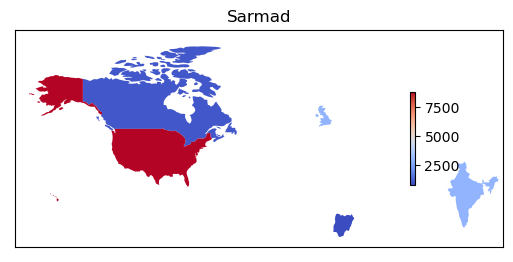

In [216]:
import matplotlib.pyplot as plt

# create the map plot
fig, ax = plt.subplots(1, figsize=(6, 4))
merged_stem2.plot(column='counts', cmap='coolwarm', legend=True, legend_kwds={'shrink': 0.3, 'pad': -0.2}, ax=ax)

# add a rectangular patch behind the map
background_rect = plt.Rectangle((-1, 0), 1, 1, transform=ax.transAxes, color='whitesmoke', alpha=0.8)
ax.add_patch(background_rect)

# iterate over each row in the merged dataframe and add the count as text on top of the country

# set axis limits
ax.set_xlim([-180, 100])
ax.set_ylim([0, 90])
ax.set_xticks([])
ax.set_yticks([])

# set the title of the plot
plt.title('Sarmad')

# show the plot
plt.show()



### Analysing these countries with dates

In [217]:
df_us_stem = df_stem.groupBy('User_Defined_Location','Tweet_month-year').agg(count('User_ID').alias('count'))\
        .filter(col('User_Defined_Location') == 'United States of America').orderBy('Tweet_month-year').toPandas()

In [218]:
df_uk_stem = df_stem.groupBy('User_Defined_Location','Tweet_month-year').agg(count('User_ID').alias('count'))\
        .filter(col('User_Defined_Location') == 'UK').orderBy('Tweet_month-year').toPandas()

In [219]:
df_ni_stem = df_stem.groupBy('User_Defined_Location','Tweet_month-year').agg(count('User_ID').alias('count'))\
        .filter(col('User_Defined_Location') == 'Nigeria').orderBy('Tweet_month-year').toPandas()

In [220]:
df_in_stem = df_stem.groupBy('User_Defined_Location','Tweet_month-year').agg(count('User_ID').alias('count'))\
        .filter(col('User_Defined_Location') == 'India').orderBy('Tweet_month-year').toPandas()

In [221]:
df_ca_stem = df_stem.groupBy('User_Defined_Location','Tweet_month-year').agg(count('User_ID').alias('count'))\
        .filter(col('User_Defined_Location') == 'Canada').orderBy('Tweet_month-year').toPandas()

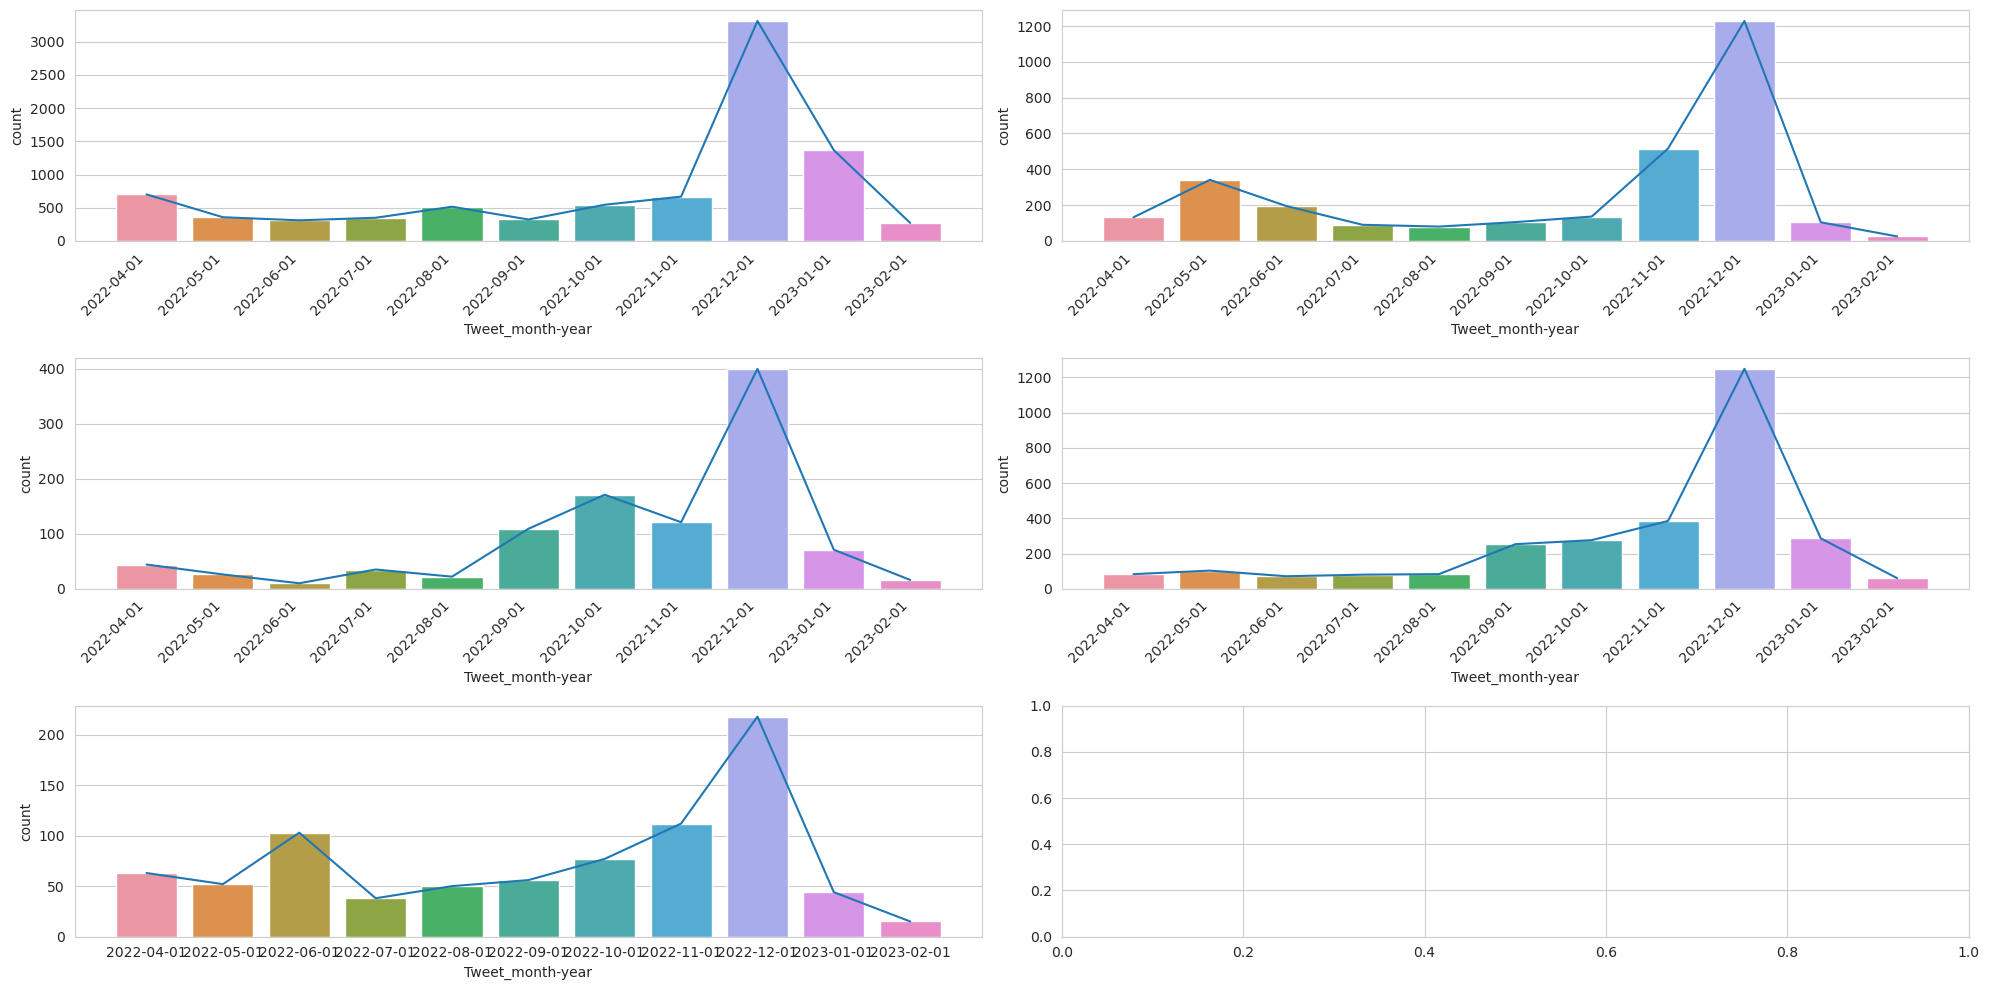

In [238]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
sns.barplot(x=df_us_stem['Tweet_month-year'].astype(str), y=df_us_stem['count'], ax=axes[0,0])
sns.lineplot(x=df_us_stem['Tweet_month-year'].astype(str), y=df_us_stem['count'], ax=axes[0,0])

sns.barplot(x=df_in_stem['Tweet_month-year'].astype(str), y=df_in_stem['count'], ax=axes[0,1])
sns.lineplot(x=df_in_stem['Tweet_month-year'].astype(str), y=df_in_stem['count'], ax=axes[0,1])

sns.barplot(x=df_ca_stem['Tweet_month-year'].astype(str), y=df_ca_stem['count'], ax=axes[1,0])
sns.lineplot(x=df_ca_stem['Tweet_month-year'].astype(str), y=df_ca_stem['count'], ax=axes[1,0])

sns.barplot(x=df_uk_stem['Tweet_month-year'].astype(str), y=df_uk_stem['count'], ax=axes[1,1])
sns.lineplot(x=df_uk_stem['Tweet_month-year'].astype(str), y=df_uk_stem['count'], ax=axes[1,1])

sns.barplot(x=df_ni_stem['Tweet_month-year'].astype(str), y=df_ni_stem['count'], ax=axes[2,0])
sns.lineplot(x=df_ni_stem['Tweet_month-year'].astype(str), y=df_ni_stem['count'], ax=axes[2,0])

axes[0,0].set_xticklabels(labels=df_us_stem['Tweet_month-year'].astype(str), rotation=45, ha='right')
axes[0,1].set_xticklabels(labels=df_us_stem['Tweet_month-year'].astype(str), rotation=45, ha='right')
axes[1,0].set_xticklabels(labels=df_us_stem['Tweet_month-year'].astype(str), rotation=45, ha='right')
axes[1,1].set_xticklabels(labels=df_us_stem['Tweet_month-year'].astype(str), rotation=45, ha='right')

plt.tight_layout()
plt.show()

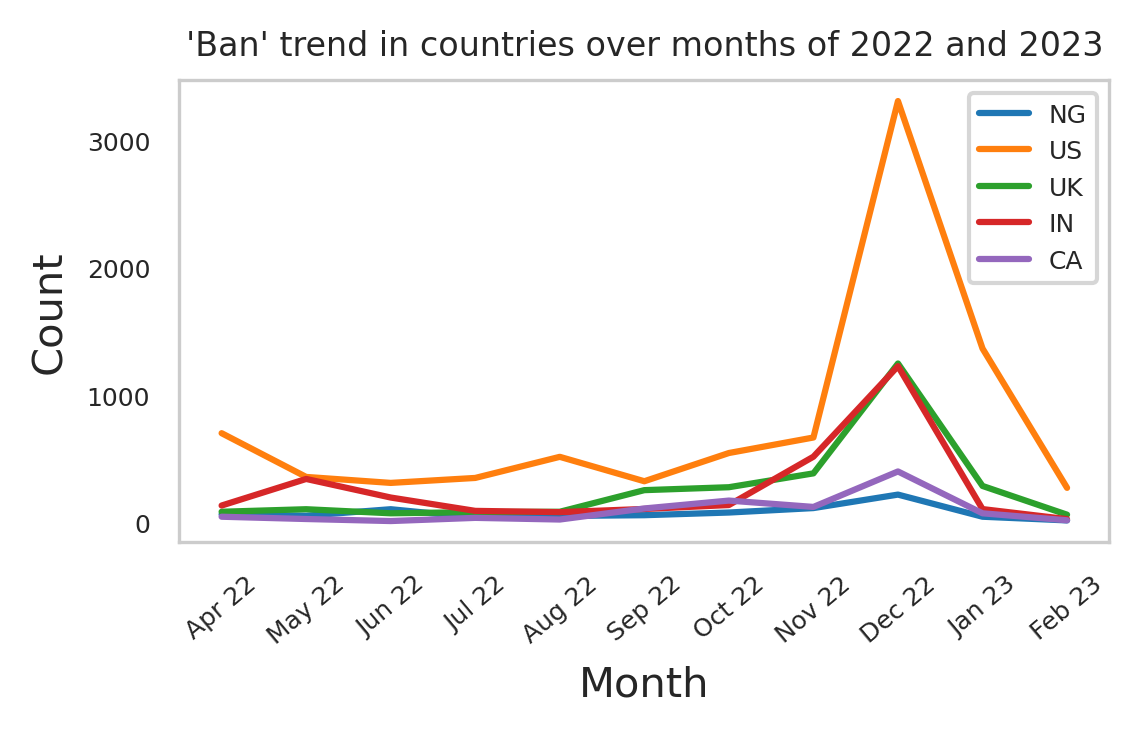

In [244]:
plt.figure(figsize=(4,2), dpi = 300)
colors = sns.color_palette('pastel')[0:1]
sns.lineplot(x=df_ni_stem['Tweet_month-year'].astype(str), y=df_ni_stem['count'], palette = colors ,label ='NG')
sns.lineplot(x=df_us_stem['Tweet_month-year'].astype(str), y=df_us_stem['count'], palette = colors, label = 'US')
sns.lineplot(x=df_uk_stem['Tweet_month-year'].astype(str), y=df_uk_stem['count'], palette = colors, label = 'UK')
sns.lineplot(x=df_in_stem['Tweet_month-year'].astype(str), y=df_in_stem['count'], palette = colors, label = 'IN')
sns.lineplot(x=df_ca_stem['Tweet_month-year'].astype(str), y=df_ca_stem['count'], palette = colors, label = 'CA')
plt.legend(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Month', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.title("'Ban' trend in countries over months of 2022 and 2023", fontsize = 8)
x_ticks = ['Apr 22', 'May 22', 'Jun 22', 'Jul 22', 'Aug 22', 'Sep 22', 'Oct 22', 'Nov 22', 'Dec 22', 'Jan 23', 'Feb 23']
plt.xticks(range(len(x_ticks)), x_ticks, rotation=40, fontsize=6)


plt.grid()
plt.show()

In [ ]:
df_stem

In [220]:
df_stem.filter(col('User_Defined_Location') == 'United States of America').groupBy('User_Defined_Location', 'RT_Status_Original_User_Screen_Name', 'RT_Status_Original_User_ID').agg(count('Tweet_ID').alias('Tweet_Counts'), avg('RT_Status_RT_Count').alias('Avg_RT')).orderBy('Tweet_Counts', ascending = False).limit(5)

User_Defined_Location,RT_Status_Original_User_Screen_Name,RT_Status_Original_User_ID,Tweet_Counts,Avg_RT
United States of ...,NasimiShabnam,3317348164,3110,14762.346623794212
United States of ...,lindyli,270132611,762,3378.3937007874015
United States of ...,null,null,630,null
United States of ...,AfricanArchives,808806102,456,2811.252192982456
United States of ...,Lancegooden,1029094268542099457,416,2194.1875


In [221]:
df_stem.filter(col('User_Defined_Location') == 'UK').groupBy('User_Defined_Location', 'RT_Status_Original_User_Screen_Name', 'RT_Status_Original_User_ID').agg(count('Tweet_ID').alias('Tweet_Counts'), avg('RT_Status_RT_Count').alias('Avg_RT')).orderBy('Tweet_Counts', ascending = False).limit(5)

User_Defined_Location,RT_Status_Original_User_Screen_Name,RT_Status_Original_User_ID,Tweet_Counts,Avg_RT
UK,NasimiShabnam,3317348164,1516,8946.482189973614
UK,paul__johnson,35720019,307,1808.5765472312703
UK,BBCYaldaHakim,27831488,294,176.7312925170068
UK,DanielJMath1,1397127641874976768,287,2166.5644599303137
UK,educationgovuk,143039548,157,800.1783439490446


In [222]:
df_stem.filter(col('User_Defined_Location') == 'India').groupBy('User_Defined_Location', 'RT_Status_Original_User_Screen_Name', 'RT_Status_Original_User_ID').agg(count('Tweet_ID').alias('Tweet_Counts'), avg('RT_Status_RT_Count').alias('Avg_RT')).orderBy('Tweet_Counts', ascending = False).limit(5)

User_Defined_Location,RT_Status_Original_User_Screen_Name,RT_Status_Original_User_ID,Tweet_Counts,Avg_RT
India,talk2anuradha,1095547021,527,2616.4440227703985
India,NasimiShabnam,3317348164,467,8171.471092077088
India,RishiSunak,1168968080690749441,457,3411.205689277899
India,ashoswai,70355674,214,864.2803738317757
India,ANI,355989081,186,369.5860215053763


In [223]:
df_stem.filter(col('User_Defined_Location') == 'Canada').groupBy('User_Defined_Location', 'RT_Status_Original_User_Screen_Name', 'RT_Status_Original_User_ID').agg(count('Tweet_ID').alias('Tweet_Counts'), avg('RT_Status_RT_Count').alias('Avg_RT')).orderBy('Tweet_Counts', ascending = False).limit(5)

User_Defined_Location,RT_Status_Original_User_Screen_Name,RT_Status_Original_User_ID,Tweet_Counts,Avg_RT
Canada,NasimiShabnam,3317348164,478,12383.640167364018
Canada,ChandraPasma,984232620975247361,164,478.6219512195122
Canada,BhutilaKarpoche,867462325049208833,153,562.562091503268
Canada,Jenncun05871935,1417428142977962007,111,778.972972972973
Canada,BBCYaldaHakim,27831488,92,188.3586956521739


In [224]:
df_stem.filter(col('User_Defined_Location') == 'Nigeria').groupBy('User_Defined_Location', 'RT_Status_Original_User_Screen_Name', 'RT_Status_Original_User_ID').agg(count('Tweet_ID').alias('Tweet_Counts'), avg('RT_Status_RT_Count').alias('Avg_RT')).orderBy('Tweet_Counts', ascending = False).limit(5)

User_Defined_Location,RT_Status_Original_User_Screen_Name,RT_Status_Original_User_ID,Tweet_Counts,Avg_RT
Nigeria,AfamDeluxo,159638969,155,310.81290322580645
Nigeria,henryshield,1000955520,151,627.1059602649007
Nigeria,FS_Yusuf_,468685040,130,584.0
Nigeria,firstladyship,201237617,111,406.1081081081081
Nigeria,NasimiShabnam,3317348164,95,13333.884210526316


### We have identified top twitterers from the 5 countries to list down

In [225]:
df_stem.filter(col('RT_Status_Original_User_Screen_Name') == 'NasimiShabnam').select('RT_Status_Original_User_Location').limit(1)

RT_Status_Original_User_Location
"London, England"


In [226]:
df_stem.filter(col('RT_Status_Original_User_Screen_Name') == 'AfamDeluxo').select('RT_Status_Original_User_Location').limit(1)

RT_Status_Original_User_Location
Alaigbo


In [227]:
df_stem.filter(col('RT_Status_Original_User_Screen_Name') == 'talk2anuradha').select('RT_Status_Original_User_Location').limit(1)

RT_Status_Original_User_Location
Bengaluru


### Finding engagement for tweets
##### engagement of tweet is: favorite + rt_count + reply_count
##### checking this on original tweet

In [228]:
df_stem = df_stem.withColumn('engagement_tweet', col('RT_Status_RT_Count') + col('RT_Status_Like_Count') + col('RT_Status_Reply_Count'))

In [229]:
max_engagement = df_stem.agg(max('engagement_tweet')).collect()[0][0]
df_stem.filter(col('engagement_tweet') == max_engagement)

Tweet_ID,RT_Status_RT_Count,RT_Status_Like_Count,RT_Status_Reply_Count,RT_Stats_Quoted_Count,RT_Status_Original_User_ID,RT_Status_Original_User_Screen_Name,RT_Status_Original_User_Location,RT_Status_Original_User_Description,RT_Status_Original_User_Verified,RT_Status_Original_User_followers_count,RT_Status_Original_User_statuses_count,RT_Status_Original_User_listed_count,RT_Status_Original_Tweet_Id,RT_Status_Original_Tweet_Text,RT_Status_Original_Tweet_Created_at,Parsed_Hashtags,User_ID,User_Name,User_Defined_Location,User_Description,User_Verified,User_Profile_Followers_Count,User_Tweets-Retweet_Count,User_List_Count,User_ID_Creation_Date,RT_Mentioned_User_ID,Tweet_Location_Lat,Tweet_Location_Long,If_Retweeted,If_Retweeted_Root,Place_Country,Text,Tweet_Text,Tweet_Date,Tweet_day_of_week,Tweet_month,Tweet_day,Tweet_year,Tweet_month_number,Tweet_date_str,Tweet_date_Concat,Tweet_month-year,engagement_tweet
1616055822282534913,34279,110604,1040,1044,3317348164,NasimiShabnam,"London, England",Former Policy Adv...,true,70901,12282,279,1605847661600329732,A day after of th...,Thu Dec 22 08:48:...,[],75834891,almcdermid,United States of ...,Capitalism is the...,false,4418,42383,55,Sun Sep 20 17:39:...,[],null,null,false,RT,null,RT @NasimiShabnam...,A day after of th...,Thu Jan 19 12:51:...,Thu,Jan,19,2023,01,2023/01/19,2023-01-19,2023-01-01,145923


In [230]:
best_tweet = df_stem.filter(col('RT_Status_Original_Tweet_Id') == '1605847661600329732').select('RT_Status_Original_Tweet_Text').distinct().toPandas()

In [268]:
pd.set_option('display.max_colwidth', None)


In [473]:
best_tweet

,RT_Status_Original_Tweet_Text
0,"A day after of the Taliban BANNED female university education, women &amp; girls have come out on the streets of Kabul… https://t.co/HPRjdxff4Q"


##### this tweet has most engagements, it is about Agf but thw twitters posting it are in UK

## Step5: Time Series Analysis

In [72]:
df.limit(5)

23/03/10 19:08:04 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Tweet_ID,RT_Status_RT_Count,RT_Status_Like_Count,RT_Status_Reply_Count,RT_Stats_Quoted_Count,RT_Status_Original_User_ID,RT_Status_Original_User_Screen_Name,RT_Status_Original_User_Location,RT_Status_Original_User_Description,RT_Status_Original_User_Verified,RT_Status_Original_User_followers_count,RT_Status_Original_User_statuses_count,RT_Status_Original_User_listed_count,RT_Status_Original_Tweet_Id,RT_Status_Original_Tweet_Text,RT_Status_Original_Tweet_Created_at,Parsed_Hashtags,User_ID,User_Name,User_Defined_Location,User_Description,User_Verified,User_Profile_Followers_Count,User_Tweets-Retweet_Count,User_List_Count,User_ID_Creation_Date,RT_Mentioned_User_ID,Tweet_Location_Lat,Tweet_Location_Long,If_Retweeted,If_Retweeted_Root,Place_Country,Text,Tweet_Text,Tweet_Date,Tweet_day_of_week,Tweet_month,Tweet_day,Tweet_year,Tweet_month_number,Tweet_date_str,Tweet_date_Concat
1573344589586595840,298,1048,9,9,1090715513586679813,JoshuaPotash,Lenapehoking (NYC),Earthseed | Aboli...,false,232790,44403,1388,1573319288815255552,One of the most u...,Fri Sep 23 14:32:...,[],2859451981,Hxndro,United States of ...,don’t be sheep,false,402,24010,0,Fri Oct 17 04:38:...,[],null,null,false,RT,null,RT @JoshuaPotash:...,One of the most u...,Fri Sep 23 16:12:...,Fri,Sep,23,2022,09,2022/09/23,2022-09-23
1573344619999404033,4,0,0,0,2933506735,DrewbeDoobie77,214,Educator| Photogr...,false,5532,21540,4,1573319347283677187,Anyone looking fo...,Fri Sep 23 14:32:...,[],999794779,supkupp,jax&tally,famu alumna. poet...,false,2767,61758,13,Sun Dec 09 17:49:...,[],null,null,false,RT,null,RT @DrewbeDoobie7...,Anyone looking fo...,Fri Sep 23 16:12:...,Fri,Sep,23,2022,09,2022/09/23,2022-09-23
1573344663393783810,1,2,0,1,1229112199672627202,littlelouandMM,"Virtual Insanity,...",If you see someth...,false,1776,24541,1,1573341784507580416,@cathy_ahf @kitma...,Fri Sep 23 16:01:...,[],794619937,a_n_n__m,Terf Island,Woman - ’𝑎𝑑𝑢𝑙...,false,683,7356,4,Fri Aug 31 20:30:...,[1395463712404803...,null,null,false,RT,null,RT @littlelouandM...,@cathy_ahf @kitma...,Fri Sep 23 16:12:...,Fri,Sep,23,2022,09,2022/09/23,2022-09-23
1573344700353941508,489,229,24,5,2792188972,BashaDesta,From Tigray,Lifelong Advocate...,false,47647,11948,8,1573014550244429832,That's why we cal...,Thu Sep 22 18:21:...,[],4737492556,tsehaymarga,null,Gurage Red heart ...,false,129,1056,0,Thu Jan 07 19:38:...,[],null,null,false,RT,null,RT @BashaDesta: T...,That's why we cal...,Fri Sep 23 16:13:...,Fri,Sep,23,2022,09,2022/09/23,2022-09-23
1573344756851216387,32,142,7,1,1276140426,DeAngelisCorey,"Washington, DC","Senior Fellow, @S...",true,109038,114629,610,1573338072804360193,Arizona Departmen...,Fri Sep 23 15:46:...,[],1525945765717327872,kimberlee_kc,🇺🇸,Life happens ☕️he...,false,3997,15475,3,Sun May 15 21:07:...,[],null,null,false,RT,null,RT @DeAngelisCore...,Arizona Departmen...,Fri Sep 23 16:13:...,Fri,Sep,23,2022,09,2022/09/23,2022-09-23


In [6]:
df_timeline_pd = df.groupBy('Tweet_date_Concat').agg(count('Tweet_ID').alias('tweets')).toPandas()

In [7]:
df_timeline_pd.Tweet_date_Concat = pd.to_datetime(df_timeline_pd.Tweet_date_Concat)

In [75]:
df_timeline_pd['month'] = df_timeline_pd['Tweet_date_Concat'].dt.month

In [81]:
df_timeline_pd_month = df_timeline_pd.groupby('month')['tweets'].sum().reset_index()


In [84]:
df_timeline_pd_month.loc[11] = [3,0] 

In [93]:
df_timeline_pd_month =df_timeline_pd_month.sort_values('month').reset_index(drop = True)

In [99]:
df_timeline_pd_month.set_index('month', inplace = True)

In [103]:
df_timeline_pd_month

,tweets
month,
1,161035
2,50320
3,0
4,136569
5,195928
6,147140
7,153616
8,186448
9,185268


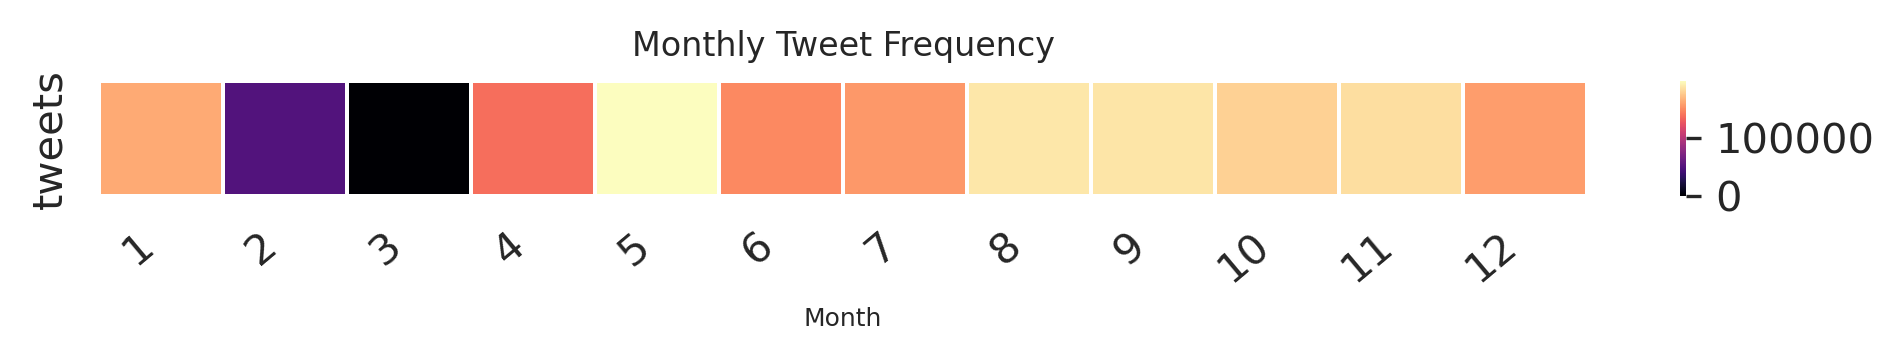

In [134]:
fig, ax = plt.subplots(figsize=(8,0.5), dpi = 300)

sns.heatmap(df_timeline_pd_month.transpose(), fmt=".0f", linewidths=.5, ax=ax, cmap ='magma' ,xticklabels=df_timeline_pd_month.index, cbar=True)
ax.set_xticklabels(df_timeline_pd_month.index, rotation=40, ha='right')

plt.title('Monthly Tweet Frequency', fontsize=8)
plt.xlabel('Month', fontsize=6)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [8]:
df_timeline_dow_pd = df.groupBy('Tweet_day_of_week').agg(count('Tweet_ID').alias('tweets')).toPandas()

In [9]:
df_timeline_verified_pd = df.filter(col('RT_Status_Original_User_Verified') == True).groupBy('Tweet_date_Concat').agg(count('Tweet_ID').alias('tweets')).toPandas()

In [105]:
df_timeline_pd

,Tweet_date_Concat,tweets,month
0,2022-07-31,3620,7
1,2022-07-27,4821,7
2,2022-08-02,3901,8
3,2022-11-29,4071,11
4,2022-12-25,2732,12
...,...,...,...
305,2022-05-03,4455,5
306,2022-04-17,4337,4
307,2023-01-19,6749,1
308,2022-09-13,5521,9


In [104]:
df_timeline_verified_pd

,Tweet_date_Concat,tweets
0,2022-07-31,668
1,2022-07-27,1309
2,2022-08-02,1092
3,2022-11-29,978
4,2022-12-25,1319
...,...,...
305,2022-05-03,1309
306,2022-04-17,1433
307,2023-01-19,1474
308,2022-08-31,2195


In [53]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

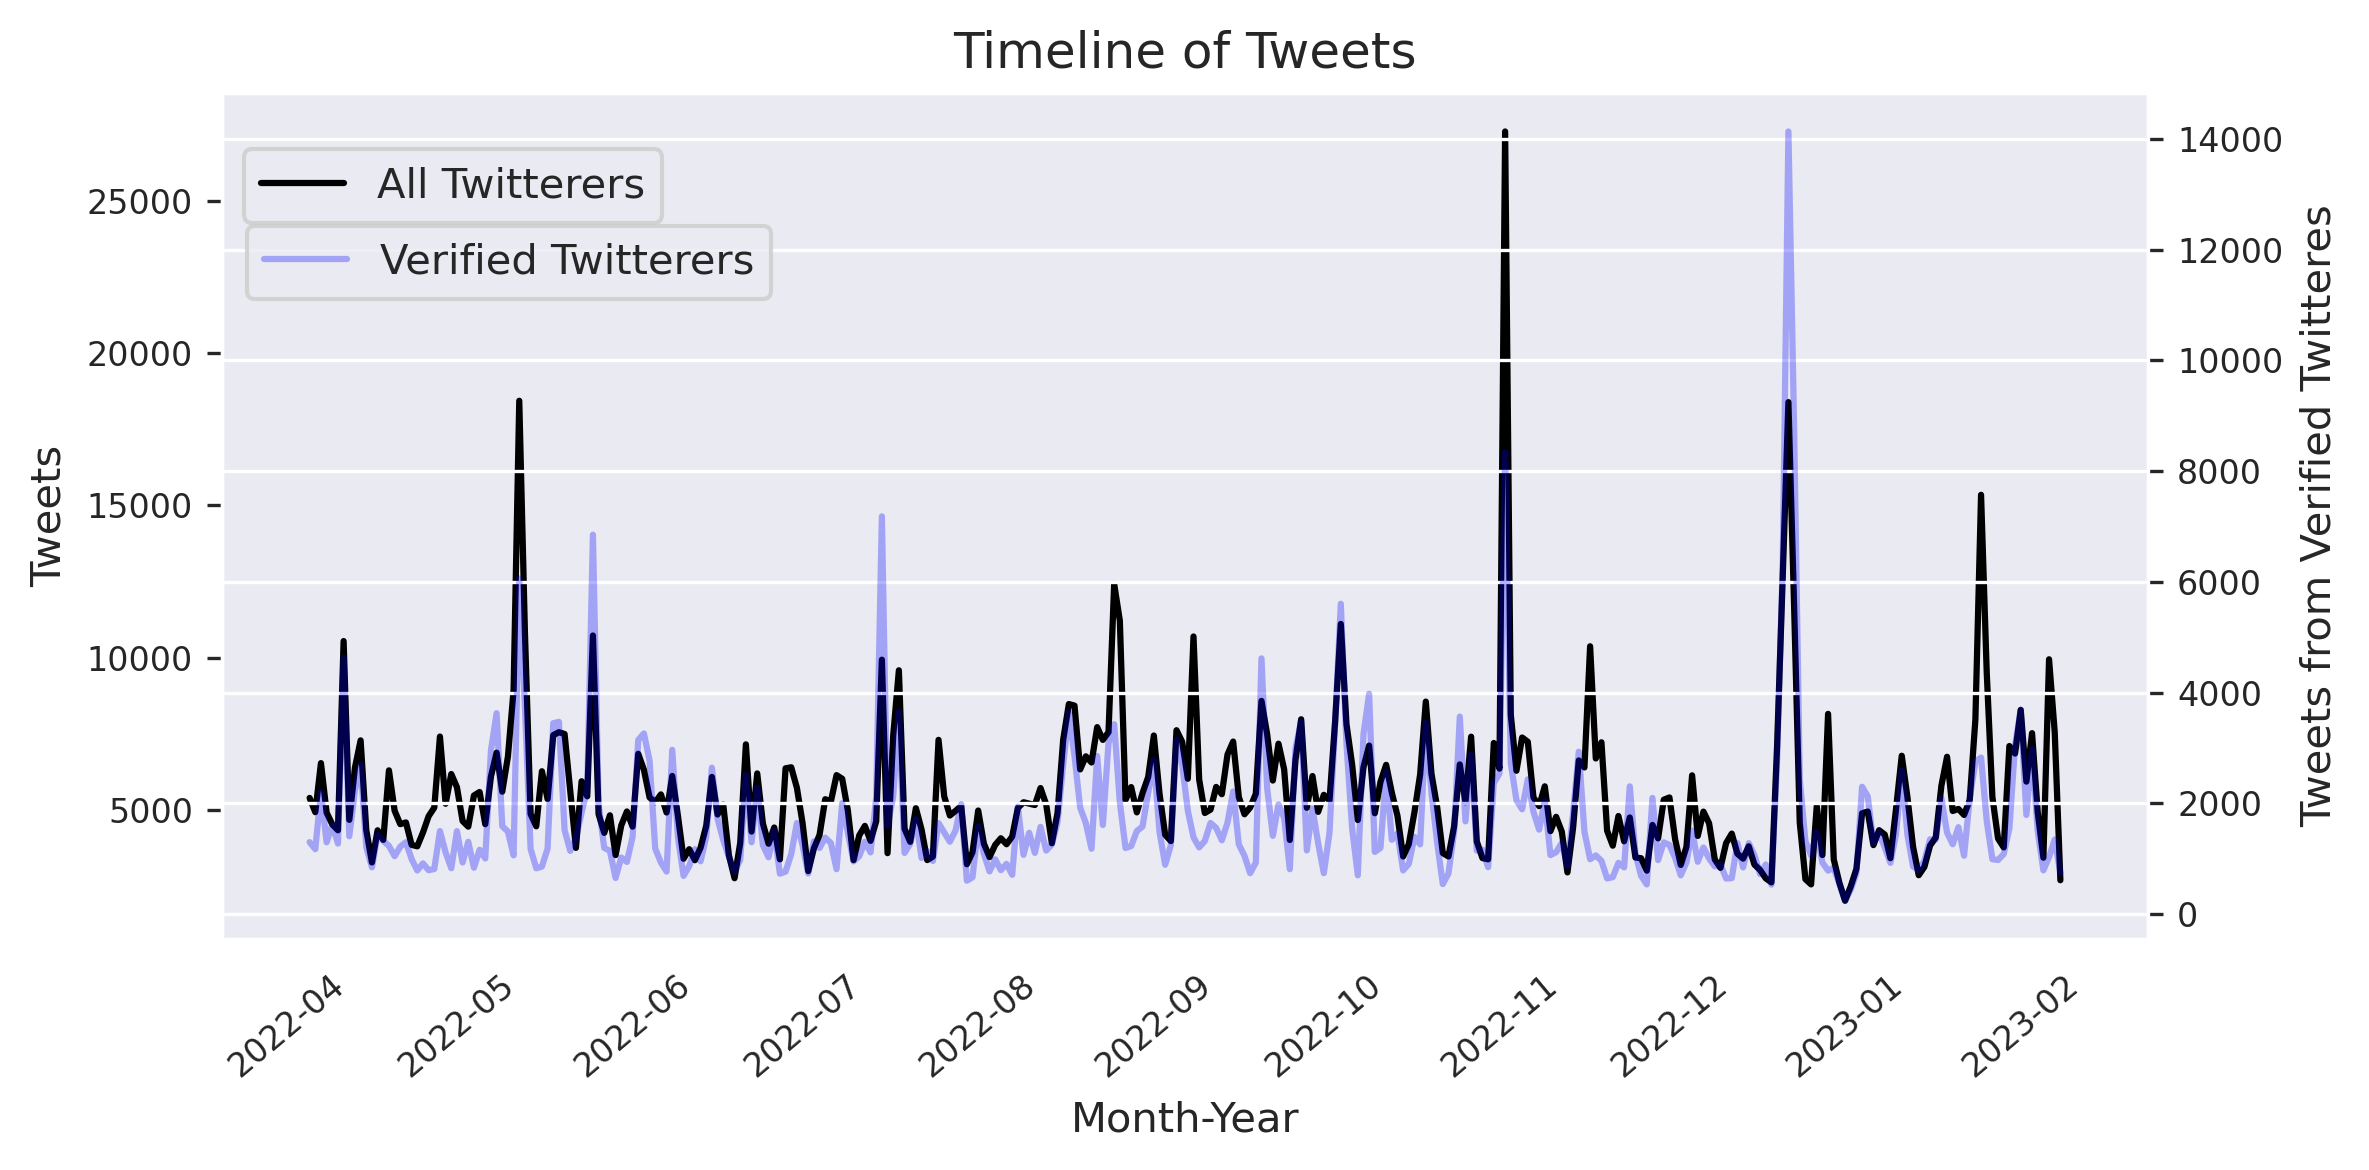

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette('pastel')[0:5]


fig, ax1 = plt.subplots(figsize = (8,4), dpi = 300)
sns.lineplot(x=df_timeline_pd.Tweet_date_Concat, y=df_timeline_pd.tweets, ax=ax1, color = 'black')

ax1.set_xlabel('Month-Year', fontsize=10)
ax1.set_ylabel('Tweets', fontsize=10)
ax1.set_title('Timeline of Tweets')
ax1.tick_params(axis='y', labelsize=8)
ax1.tick_params(axis='x', labelsize=8, rotation=40)

ax2 = ax1.twinx()
sns.lineplot(x=df_timeline_verified_pd.Tweet_date_Concat, y=df_timeline_verified_pd.tweets, color='blue', alpha=0.3, ax=ax2)

ax2.set_ylabel('Tweets from Verified Twitteres', fontsize=10)
ax2.tick_params(axis='y', labelsize=8)

ax1.grid()

ax1.legend(['All Twitterers'], bbox_to_anchor=(0.12, 0.89), loc='center')
ax2.legend(['Verified Twitterers'], bbox_to_anchor=(0.149, 0.8), loc='center')

fig.tight_layout()

plt.show()


In [12]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
df_timeline_dow_pd['Tweet_day_of_week'] = df_timeline_dow_pd['Tweet_day_of_week'].astype(cat_type)

In [13]:
df_timeline_dow_pd

,Tweet_day_of_week,tweets
0,Sun,188074
1,Mon,236096
2,Thu,305006
3,Sat,197905
4,Wed,300851
5,Tue,260666
6,Fri,243203


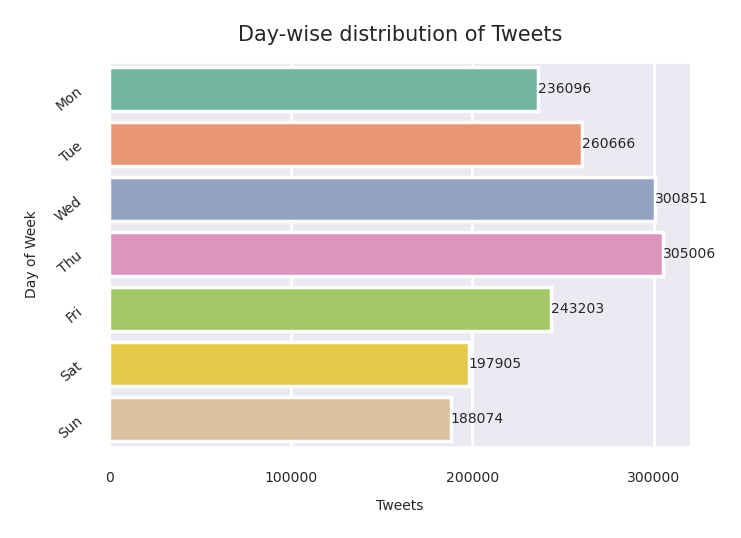

In [71]:
plt.figure(dpi=250, figsize = (3,2))
ax = sns.barplot(y = df_timeline_dow_pd.Tweet_day_of_week, x= df_timeline_dow_pd.tweets)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize = 4)
    
plt.yticks(rotation = 40, fontsize = 4)
plt.xticks( fontsize = 4)
plt.ylabel('Day of Week', fontsize = 4)
plt.xlabel('Tweets', fontsize = 4)
plt.title('Day-wise distribution of Tweets', fontsize = 6)

plt.show()

### Understanding the spike in Dec 2022

In [15]:
spike1_df = df.filter((col("Tweet_date_Concat") >= '2022-12-15') & (col("Tweet_date_Concat") <= '2023-01-01'))


In [16]:
spike1_df.count()

100047

In [170]:
spike1_df_pd = spike1_df.filter(col('User_Defined_Location').isNotNull()).groupBy('User_Defined_Location').agg(count('Tweet_ID').alias('count')).orderBy('count', ascending = False).limit(5).toPandas()

In [171]:
spike1_df_pd

,User_Defined_Location,count
0,United States of America,13416
1,India,5736
2,UK,3050
3,Canada,1412
4,Pakistan,1399


([<matplotlib.patches.Wedge at 0x7f1adae1e160>,
 [Text(-0.12538183709240935, 1.0928309086621464, 'US'),
  Text(-0.6408389086580784, -0.8940500506962253, 'IN'),
  Text(0.5095244264130419, -0.9748768429337424, 'UK'),
  Text(0.9497714639547182, -0.554918161765599, 'CA'),
  Text(1.0830625268508123, -0.19229030899016658, 'PAK')],
 [Text(-0.068390092959496, 0.5960895865429889, '53.6%'),
  Text(-0.34954849563167906, -0.4876636640161229, '22.9%'),
  Text(0.27792241440711374, -0.5317510052365867, '12.2%'),
  Text(0.5180571621571189, -0.3026826336903267, '5.6%'),
  Text(0.5907613782822612, -0.1048856230855454, '5.6%')])

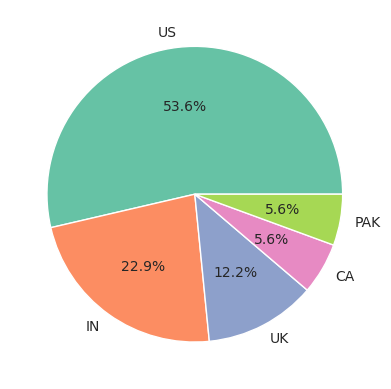

In [174]:
plt.pie(spike1_df_pd['count'], labels = ['US', 'IN', 'UK', 'CA', 'PAK'], autopct='%1.1f%%')

In [18]:
spike1_df = spike1_df.withColumn('engagement_tweet', col('RT_Status_RT_Count') + col('RT_Status_Like_Count') + col('RT_Status_Reply_Count'))

In [19]:
pd_spike1 = spike1_df.orderBy('engagement_tweet', ascending = False).limit(5).select('RT_Status_Original_User_Location','RT_Status_Original_User_Verified','RT_Status_Original_User_Screen_Name','RT_Status_Original_Tweet_Text').toPandas()

In [20]:
pd_spike1

,RT_Status_Original_User_Location,RT_Status_Original_User_Verified,RT_Status_Original_User_Screen_Name,RT_Status_Original_Tweet_Text
0,None,True,LeahRemini,Going to college for the first time at 51 afte...
1,None,True,LeahRemini,Going to college for the first time at 51 afte...
2,"West Lafayette, IN",False,MarshallShafer,Adult: go to college so you can get an educati...
3,Los Angeles,True,selenagomez,Today in my home state of Texas 18 innocent st...
4,"London, England",True,NasimiShabnam,A day after of the Taliban BANNED female unive...


In [21]:
exploded_df = spike1_df.select('*', explode('Parsed_Hashtags').alias('Hashtag'))

In [22]:
exploded_df.groupBy('Hashtag').agg(count('Tweet_ID').alias('count')).orderBy('count', ascending= False).limit(5)

Hashtag,count
Tigray,3215
education,1389
Education,932
Taliban,783
Afghanistan,736


### Understanding the spike in May 2022

In [23]:
spike2_df = df.filter((col("Tweet_date_Concat") >= '2022-05-01') & (col("Tweet_date_Concat") <= '2022-05-10'))


In [24]:
spike2_df.count()

55796

In [135]:
spike2_df_pd = spike2_df.filter(col('User_Defined_Location').isNotNull()).groupBy('User_Defined_Location').agg(count('Tweet_ID').alias('count')).orderBy('count', ascending = False).limit(5).toPandas()

In [139]:
spike2_df_pd

,User_Defined_Location,count
0,United States of America,10739
1,India,2308
2,UK,1372
3,Canada,1263
4,Nigeria,1082


In [165]:
plt.pie(spike2_df_pd['count'], labels = ['US', 'IN', 'UK', 'CA', 'NI'], autopct='%1.1f%%')

SyntaxError: invalid syntax (1212531832.py, line 1)

([<matplotlib.patches.Wedge at 0x7f1adba50160>,
 [Text(-0.4702290444137448, 0.9944267925743637, 'United States of America'),
  Text(-0.2773268968398682, -1.0644669052108522, 'India'),
  Text(0.4633225590700681, -0.997663373216018, 'UK'),
  Text(0.8808423373496126, -0.6588753878636472, 'Canada'),
  Text(1.077464181101539, -0.2215196118703493, 'Nigeria')])

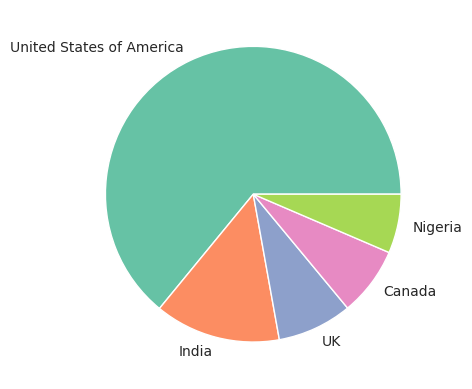

In [149]:
plt.pie(spike2_df_pd['count'], labels = spike2_df_pd.User_Defined_Location)

In [26]:
spike2_df = spike2_df.withColumn('engagement_tweet', col('RT_Status_RT_Count') + col('RT_Status_Like_Count') + col('RT_Status_Reply_Count'))

In [27]:
pd_spike2 = spike2_df.orderBy('engagement_tweet', ascending = False).limit(5).select('RT_Status_Original_User_Location','RT_Status_Original_User_Verified','RT_Status_Original_User_Screen_Name','RT_Status_Original_Tweet_Text').toPandas()

In [28]:
pd_spike2

,RT_Status_Original_User_Location,RT_Status_Original_User_Verified,RT_Status_Original_User_Screen_Name,RT_Status_Original_Tweet_Text
0,None,True,LeahRemini,Going to college for the first time at 51 afte...
1,None,True,LeahRemini,Going to college for the first time at 51 afte...
2,None,True,LeahRemini,Going to college for the first time at 51 afte...
3,None,True,LeahRemini,Going to college for the first time at 51 afte...
4,None,True,LeahRemini,Going to college for the first time at 51 afte...


In [29]:
exploded_df2 = spike2_df.select('*', explode('Parsed_Hashtags').alias('Hashtag'))

In [30]:
exploded_df2.groupBy('Hashtag').agg(count('Tweet_ID').alias('count')).orderBy('count', ascending= False).limit(5)

Hashtag,count
education,937
ChildrenOfTigray,631
Education,547
savesoil,293
MPTETVARG3_51000,278


### Understanding the spike in Aug 2022

In [31]:
spike3_df = df.filter((col("Tweet_date_Concat") >= '2022-08-25') & (col("Tweet_date_Concat") <= '2022-08-31'))


In [32]:
spike3_df.count()

51283

In [166]:
spike3_df_pd = spike3_df.filter(col('User_Defined_Location').isNotNull()).groupBy('User_Defined_Location').agg(count('Tweet_ID').alias('count')).orderBy('count', ascending = False).limit(5).toPandas()

In [167]:
spike3_df_pd

,User_Defined_Location,count
0,United States of America,11418
1,India,2551
2,UK,892
3,Nigeria,890
4,Canada,843


([<matplotlib.patches.Wedge at 0x7f1adb5cfac0>,
 [Text(-0.6127928221871936, 0.913501481704247, 'US'),
  Text(0.10314166971893983, -1.0951537773151263, 'IN'),
  Text(0.7463633369799577, -0.8080481230794008, 'UK'),
  Text(0.9717588873727749, -0.5154460833220355, 'NI'),
  Text(1.086020420214359, -0.1748131770703435, 'CA')],
 [Text(-0.3342506302839237, 0.49827353547504377, '68.8%'),
  Text(0.056259092573967176, -0.5973566058082507, '15.4%'),
  Text(0.4071072747163405, -0.4407535216796731, '5.4%'),
  Text(0.5300503022033317, -0.2811524090847466, '5.4%'),
  Text(0.5923747746623775, -0.09535264203836917, '5.1%')])

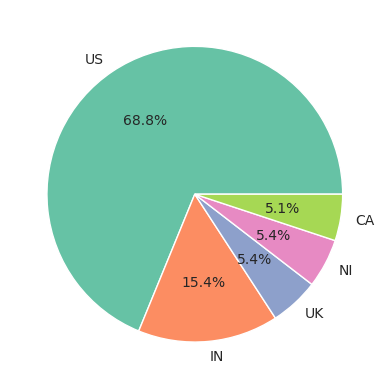

In [175]:
plt.pie(spike3_df_pd['count'], labels = ['US', 'IN', 'UK', 'NI', 'CA'] ,autopct='%1.1f%%')

In [34]:
spike3_df = spike3_df.withColumn('engagement_tweet', col('RT_Status_RT_Count') + col('RT_Status_Like_Count') + col('RT_Status_Reply_Count'))

In [35]:
pd_spike3 = spike3_df.orderBy('engagement_tweet', ascending = False).limit(5).select('RT_Status_Original_User_Location','RT_Status_Original_User_Verified','RT_Status_Original_User_Screen_Name','RT_Status_Original_Tweet_Text').toPandas()

In [36]:
pd_spike3

,RT_Status_Original_User_Location,RT_Status_Original_User_Verified,RT_Status_Original_User_Screen_Name,RT_Status_Original_Tweet_Text
0,Nearest Disaster Zone,False,AshleyAlready,"Okay, so I rearranged my whole life to avoid s..."
1,Nearest Disaster Zone,False,AshleyAlready,"Okay, so I rearranged my whole life to avoid s..."
2,Nearest Disaster Zone,False,AshleyAlready,"Okay, so I rearranged my whole life to avoid s..."
3,Nearest Disaster Zone,False,AshleyAlready,"Okay, so I rearranged my whole life to avoid s..."
4,Nearest Disaster Zone,False,AshleyAlready,"Okay, so I rearranged my whole life to avoid s..."


In [37]:
exploded_df3 = spike3_df.select('*', explode('Parsed_Hashtags').alias('Hashtag'))

In [38]:
exploded_df3.groupBy('Hashtag').agg(count('Tweet_ID').alias('count')).orderBy('count', ascending= False).limit(5)

Hashtag,count
education,761
90percentscholarship,600
Tigray,317
KCR,265
Education,240
